In [ ]:
using Plots, ComplexF64

# Quantum coherence functions

Quantum coherence is a fundamental aspect of quantum mechanics, which sets it apart from classical physics. It is the basis for quantum superposition and entanglement, among other uniquely quantum phenomena. Quantum coherence describes the capacity of a quantum system to display interference effects. It is a consequence of the wave-like behavior of quantum objects and the superposition principle.

## Classical coherence

Suppose we have Young's classical two-split experiment, where we have a source of light, a screen with two slits, and a detector screen. 
Let us use a source of light with bandwidth $\Delta \omega$ and a path difference of $\Delta s$ between the two slits. This famous experiment is used to demonstrate the wave-like behavior of light, and we all know that we will see an interference pattern on the detector screen:


┌ Info: Saved animation to /home/jose/Documents/STUDY/Bsc/Optics/notes/05_quantum_coherence/double_slit_experiment.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/Bsc/Optics/notes/05_quantum_coherence/double_slit_experiment.gif")
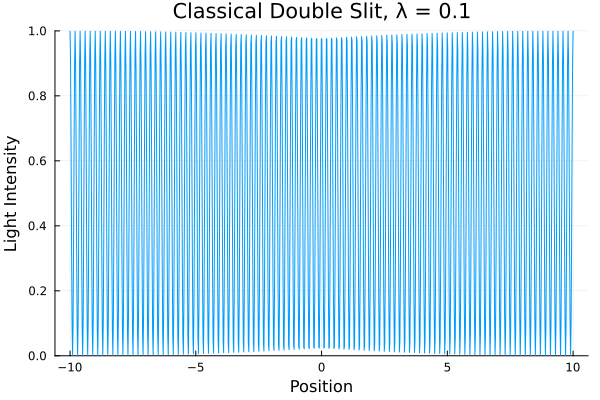

In [14]:
function double_slit(x, slit_distance, wavelength)
    return cos(π*slit_distance*x/wavelength)^2
end
slit_distance = 0.5
xmin = -10
xmax = 10
ymin = 0
ymax = 1
x = range(xmin, xmax, length=1000)
anim = @animate for wavelength = 0.1:0.05:2.0
    plot(x, double_slit.(x, slit_distance, wavelength),
             title="Classical Double Slit, λ = $wavelength",
             xlabel="Position",
             ylabel="Light Intensity",
             label="",
             ylims=(ymin, ymax))
end

gif(anim, "double_slit_experiment.gif", fps=10)



It is quite simple to note that the interference pattern will be washed out if $\Delta \omega \Delta s \geq c$ (the speed of light). Moreover, the screen will be illuminated by a total field of interference of the form:

$$
E_{\text{tot}} = K_1 E_1 + K_2 E_2 
$$

where $K_1$ and $K_2$ are constants (complex so that they can add phase shifts). This allows to compute the intensity of the total field:

$$
I_{\text{tot}} = |E_{\text{tot}}|^2 = |K_1|^2 |E_1|^2 + 2 \mathbb{Re}(|K_2|^2 |E_2|^2 + K_1^* K_2 E_1 E_2^*)\dots
$$

To ease the computation, we can define the first-order normalized mutual coherence function, which you can think of as the correlation between the two fields:

$$
\gamma^{(1)} = \frac{K_1^* K_2}{|K_1| |K_2|} = \frac{E_1^* E_2}{|E_1| |E_2|} = \frac{E_1^* E_2}{\sqrt{I_1 I_2}}
$$

$\gamma$ parametrizes the degree of coherence between the two fields. If $\gamma = 1$, the two fields are perfectly coherent, and if $\gamma = 0$, the two fields are completely incoherent. Now, setting the phase of $Ks$ to be $\phi_1$ and $\phi_2$, we can rewrite the intensity as:

$$
I = I_1 + I_2 + 2\gamma^{(1)}  \sqrt{I_1 I_2} e^{i(\phi_2 - \phi_1)}
$$

By summing different values of $\Delta \phi$ (the phase difference between the two fields), we can obtain the maximum and minimum values of the intensity:

$$
I_{\pm} = I_1 + I_2 \pm 2\sqrt{I_1 I_2} \sqrt{1 - |\gamma^{(1)}|^2}
$$

And Rayleigh's criterion for the visibility of the interference pattern is:

$$
\Nu = \frac{I_+ - I_-}{I_+ + I_-} = 2\frac{\sqrt{I_1 I_2}}{I_1 + I_2}
$$

Lets illustrate this idea:

┌ Info: Saved animation to /home/jose/Documents/STUDY/Bsc/Optics/notes/05_quantum_coherence/interference_pattern.gif
└ @ Plots /home/jose/.julia/packages/Plots/io9zQ/src/animation.jl:156


Plots.AnimatedGif("/home/jose/Documents/STUDY/Bsc/Optics/notes/05_quantum_coherence/interference_pattern.gif")
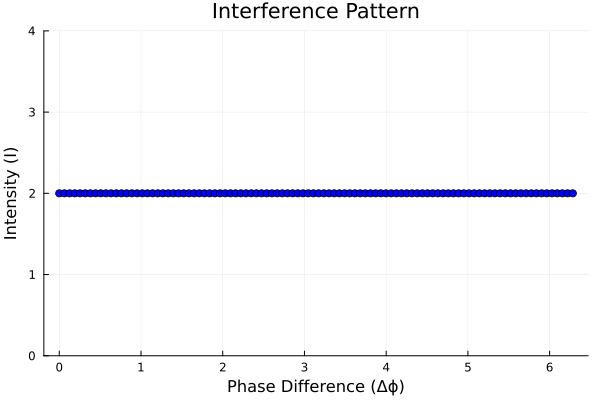

In [8]:
I1 = 1.0  
I2 = 1.0  
Δϕ_range = range(0, stop = 2π, length = 100)  
γ_range = range(0, stop = 1, length = 10)  

anim = @animate for γ in γ_range
    p = plot(title = "Interference Pattern", 
             xlabel = "Phase Difference (Δϕ)", ylabel = "Intensity (I)", ylims = (0, 4))
    for Δϕ in Δϕ_range
        I = I1 + I2 + 2γ * sqrt(I1 * I2) * cos(Δϕ)  
        scatter!([Δϕ], [I], color = :blue, markersize = 4, label="")
    end
    plot!(p)
end
gif(anim, "interference_pattern.gif", fps = 10)


## Quantum coherence

Now we are going to use what we learned just before about the interation between a field and an atom to study the coherence of a quantum system. We will consider a two-level atom with a ground state $\ket{g}$ and an excited state $\ket{e}$, and a field with two modes $\ket{1}$ and $\ket{2}$. The atom-field interaction Hamiltonian where the field $E$ has already been quantized is again:

$$H_I = d \cdot E \quad E \underbrace{\approx}_{\text{Plane wave}} i\sum_{ks} \frac{\hbar \omega_k}{2\epsilon_0 V} (\hat a_k \hat e_{ikr} - \hat a ^\dagger_k \hat e^*_{ikr})$$

where $d$ is the dipole moment of the atom, $E$ is the electric field, $V$ is the volume of the cavity, $\hat a_k$ is the annihilation operator of the field mode $k$, and $\hat e_{ikr}$ is the polarization vector of the field mode $k$ at the position of the atom. Moreover, we are only interested in those absortions (not emissions) from the detector, thus, we can only keep:

$$E^+ = i\sum_k \frac{\hbar \omega_k}{2\epsilon_0 V} \hat a_k \hat e_{ikr}$$

The matrix element for the atom going from $\ket{g}$ to $\ket{e}$ is:

$$
\bra{e}\bra{f} H_I \ket{d}\ket{i} = -\underbrace{\bra{e}d\ket{g}}_{\text{Atom interaction}} \overbrace{\bra{f}E^+\ket{i}}^{\text{Field interaction}}.
$$

Then we can compute the probability of the atom going $\ket{d}\ket{i}$ to $\bra{e}\bra{f}$ as the sandwich of the matrix element with the density matrix.

Note that we only care about the detector's state (not the field), and so we shall sum over all possible $\ket{f}$, and no-one can assure the field is in a Fock state, but rather it is possibly in a superposition of Fock states. Thus, we can write the expectation value using the density matrix $\rho_F$ of the field:

$$\sum_f (\bra{f}E^+\ket{i})^2 = \text{Tr}(\rho_F E^+ E^-) \equiv G$$

This $G$ we have just introduced plays the role of the classical intensity $I$ in the previous section per each one of the two fields in the context of the double slit experiment. Thus, the total intensity has to be computed in the same way we did before for the classical case:

$$I = K_1^2 G_{11} + K_2^2 G_{22} + 2 \mathbb{Re}(K_1 K_2^*G_{12})$$

In our simplified notation, we are labeling the intensity of the field $G_{ij}$, where $i$ and $j$ are the modes of the field, this is:

$$G_{ij} = \text{Tr}(\rho_F E^+_i E^-_j)$$

Then, for convenience, we can redefine the first-order normalized mutual coherence function, as a analog of the classical $\gamma$ one, but this time for the quantum case:

$$
g_{12} = \frac{G_{12}}{\sqrt{G_{11} G_{22}}}
$$

### The plane wave case

Recall the most basic field we can think of is the single mode plane-wave solution:

$$E^+ = i K \hat a e^{k\cdot r - \omega t}$$

For this case, we can compute the intensities as:

$$G_{11} = G_{22} = \bra{n}E^-E^+\ket{n} = K^2n$$
$$G_{12} = \bra{n}E^-E^+\ket{n} = K^2 n e^{i\Delta \phi}$$

where $\Delta \phi = \phi_2 - \phi_1$ is the phase difference between the two modes. Then, the visibility is:

$$\Nu = \frac{2\sqrt{G_{11} G_{22}}}{G_{11} + G_{22}} = \frac{2\sqrt{K^2 n K^2 n}}{K^2 n + K^2 n} = 1$$

## Young Interference

Let us suppose that after each one of the slits, a spherical wave is generated with each one of the pinholes at the same distance from the screen. Then, the field has the form:

$$E+= i \frac{\hbar \omega}{8\epsilon_0\pi R}\frac{e^{ikR}}{R} \hat a e^{ik\cdot r - \omega t}$$

where $R$ is the distance from the slit to the detector. Then, the intensity is:

$$I = \Big[\frac{\hbar \omega}{8\epsilon_0\pi R} \frac{1}{R}\Big]^2 \text{Tr}(\rho E^-E^+) = \Big[\frac{\hbar \omega}{8\epsilon_0\pi R} \frac{1}{R}\Big]^2 (\text{Tr}(\rho a_1^\dagger a_1) + \text{Tr}(\rho a_2^\dagger a_2) + 2\text{Tr}(\rho a_1^\dagger a_2) \cos \Phi
$$

We will now rewrite the expression in a new basis such that the the single photon states are the eigenstates of the number operator. We the obtain the following expression for the transformation:

$$
\ket{n}_a \ket{0}_b = \frac{1}{\sqrt{2^n n!}}(a_1^\dagger + a_2^\dagger)^n \ket{0}_a \ket{0}_b
$$

In such basis, the case of a single photon in the field is:

$$
\ket{1}_a \ket{0}_b = \frac{1}{\sqrt{2}}(a_1^\dagger + a_2^\dagger) \underbrace{\ket{0}_a \ket{0}_b}_{\text{Vacuum}}
$$

The intensity is then:

$$I = \Big[\frac{\hbar \omega}{8\epsilon_0\pi R} \frac{1}{R}\Big]^2
\left\{
\frac{\bra{1, 0 }a_1^\dagger a_1 \ket{1, 0}}{2} + \frac{\bra{1, 0 }a_2^\dagger a_2 \ket{1, 0}}{2} + \bra{1, 0 }a_1^\dagger a_2 \ket{1, 0} \cos \Phi
\right\} = \Big[\frac{\hbar \omega}{8\epsilon_0\pi R} \frac{1}{R}\Big]^2 \cos \Phi
$$

## Higher order coherence

We have seen so far the tratment for the monochromatic case. However, it does not reveal details about the number of photons in the light. For example, two light beams with the same color and wave pattern could have very different numbers of photons.

In the 1950s, Hanbury Brown and Twiss designed a new experiment. It measured how often two detectors registered photons at nearly the same time. If the time delay between detections $\tau$ was less than the coherence time of the light $\tau_0$, this revealed information about the photon statistics of the light source. Their experiment provided more details about the light than Young's experiment could.

All trims down to measuring the coincidences as a function of time:

$$
C(\tau) = \int_{-\infty}^{\infty} I(t) I(t+\tau) dt
$$

Thus, classically one could rewrite the a version of a coherence function for independent sources as:

$$
\gamma^{(2)}(\tau) = \frac{C(\tau)}{C(0)} = 1 + \gamma^2 
$$

The quantum case has somewhat a deeper meaning. It counts the number of coincidences of arriving bounced photon pairs. The quantum version of the coherence function is:

$$
g^{(2)}(\tau) = \frac{\langle E^-(t) E^-(t+\tau) E^+(t+\tau) E^+(t) \rangle}{\langle E^-(t) E^+(t) \rangle \langle E^-(t+\tau) E^+(t+\tau) \rangle} = \frac{\hat n (\hat n - 1)}{\hat n^2}\\
$$

$$
g^{(2)}(\tau) = 1 + g^{(1)}(\tau)^2
$$